In [13]:
from matplotlib import pyplot as plt
import scipy as sc
import pandas
import math
import numpy as np
import lmfit
import os
from uncertainties import ufloat

In [14]:
def gaus1(x,m,s,scale=1):
    return scale*1/(s**2*2*np.pi)**0.5 * math.e**(-(x-m)**2/(2.*s**2))

In [15]:
def pos(x):
    for i in range(len(data[0])):
        if data[0,i]>=x:
            return i
            break

FitFunktionen

In [16]:
def gaus1fit(m,mmin,mmax,s,smin,smax,scale,scalemin,scalemax,von,bis,path): 
    model_gaus = lmfit.model.Model(gaus1)  
    pars_gaus = model_gaus.make_params()
    pars_gaus["m"].set(value=m,min=mmin,max=mmax)
    pars_gaus["s"].set(value=s,min=smin,max=smax)
    pars_gaus["scale"].set(value=scale,min=scalemin,max=scalemax)

    vonarr = pos(von)
    bisarr = pos(bis)



    #Fitten
    out_gaus = model_gaus.fit(data[1,vonarr:bisarr],x=data[0,vonarr:bisarr],params=pars_gaus,weights=1/data[2,vonarr:bisarr],nan_policy='propagate')

    fig = plt.figure(figsize=(10,5),dpi=80,linewidth=50)
    plt.errorbar(data[0,vonarr:bisarr],data[1,vonarr:bisarr],yerr=data[2,vonarr:bisarr],fmt='o',ecolor='lightgray',color='r', elinewidth=3, capsize=0,zorder=10,label="Daten")
    plt.plot(np.arange(von,bis,0.01),out_gaus.eval(x=np.arange(von,bis,0.01)),zorder=10,color='k',linestyle='--',alpha=0.5,label="Gaus-Fit")



    plt.legend(fontsize=15)
    plt.savefig('Results/'+str(path)+'.pdf')

Latex Tabels

In [17]:
def(results):
    pandas.DataFrame.to_latex()

Daten einlesen und Standartfehler as Fehler der Counts festlegen

<ErrorbarContainer object of 3 artists>

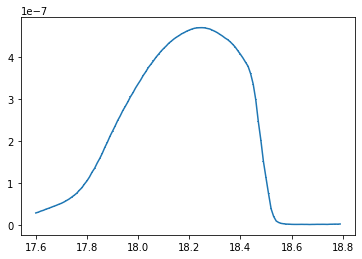

In [18]:

with open('Data_old/test.csv', mode='r') as tf:
        dataex = np.genfromtxt((line.replace(',', '.') for line in tf),delimiter=";",skip_header=21).T
        data = np.zeros((2,len(dataex[3])))
        data[0],data[1] = dataex[3],dataex[4]

err = np.zeros(len(data[1]))
for i in range(len(err)):
    err[i] = 1e-9#(data[1,i])**0.5
data = np.vstack([data,err])

v = pos(17.6)
b = pos(18.8)
plt.errorbar(data[0,v:b],data[1,v:b],yerr=data[2,v:b],label = 'Data')

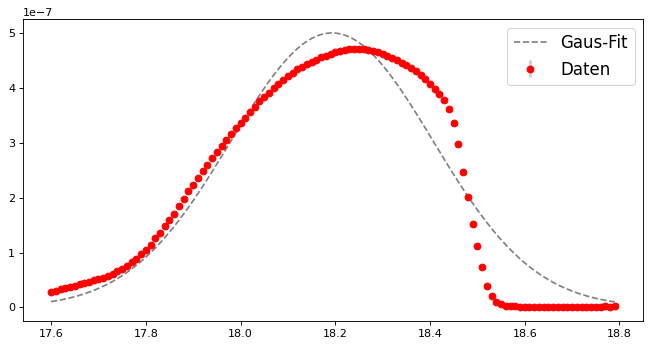

In [19]:
gaus1fit(18,17,19,1,0,1000,1,0,1000,17.6,18.8,"Peak 1")

In [23]:
x=[[1,2,3,4,5],[123,23,345,456,9876]]
print(pandas.DataFrame.to_latex(2,5,x))

/tmp/ipykernel_19538/2105808557.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(pandas.DataFrame.to_latex(2,5,x))


AttributeError: 'int' object has no attribute 'ndim'